##### 1.Optimise the following function using torch autograd and gradient descent, f(θ) = (θ₀ - 2)² + (θ₁ - 3)². In addition to finding the optima, you need to show the convergence plots. [0.5 marks]

##### 2.Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0.

Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]

Find the MLE parameters for the loc and scale using gradient descent. Plot convergence plot as well. [1 mark]

Redo the above question but learn log(scale) instead of scale and then finally transform to learn scale. What can you conclude? Why is this transformation useful? [0.5 mark]

##### 3.Generate some data (1000 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0 and using Student-T distributions with varying degrees (from 1-8) of freedom (1000 data points corresponding to each degree of freedom). Plot the pdf (and logpdf) at uniformly spaced data from (-50, 50) in steps of 0.1. What can you conclude? [1 mark]

##### 4.Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE. [1 mark]

##### 5.Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude? [1 mark]

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
num_samples = 100
distributions = torch.distributions.normal.Normal(loc=2.0, scale=4.0)
datapoint = distributions.sample((num_samples,))
print(torch.mean(datapoint), torch.std(datapoint))

tensor(2.1056) tensor(3.2960)


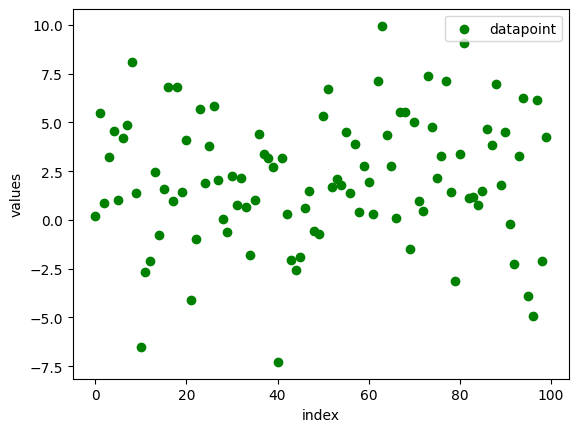

In [3]:
plt.scatter(range(num_samples),datapoint,color='g',label='datapoint')
plt.xlabel('index')
plt.ylabel('values')
plt.legend();


In [4]:
#Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]

def likelihood(data, loc, scale):
    normal_distribution = torch.distributions.normal.Normal(loc, scale)
    likelihood_value = torch.prod(normal_distribution.log_prob(data))
    return likelihood_value

def log_likelihood(data, loc, scale):
    n = len(data)
    normal_distribution = torch.distributions.normal.Normal(loc, scale)
    log_likelihood_value = torch.sum(normal_distribution.log_prob(data)) - n * torch.log(scale * (2 * torch.tensor([1.0]))**0.5)
    return log_likelihood_value

log_likelihood=log_likelihood(datapoint,2.0,4.0)
print(log_likelihood)

tensor([-437.4548])


tensor([2.0000, 2.2222, 2.4444, 2.6667, 2.8889, 3.1111, 3.3333, 3.5556, 3.7778,
        4.0000])
tensor([0.1000, 0.7556, 1.4111, 2.0667, 2.7222, 3.3778, 4.0333, 4.6889, 5.3444,
        6.0000])
tensor(-53497.6484)
tensor(-1013.4756)
tensor(-465.7697)
tensor(-397.7751)
tensor(-399.4834)
tensor(-417.1767)
tensor(-438.5608)
tensor(-460.0752)
tensor(-480.6093)
tensor(-499.8563)
tensor(-53509.8203)
tensor(-1013.6887)
tensor(-465.8307)
tensor(-397.8036)
tensor(-399.4998)
tensor(-417.1874)
tensor(-438.5683)
tensor(-460.0807)
tensor(-480.6136)
tensor(-499.8597)
tensor(-54015.8164)
tensor(-1022.5525)
tensor(-468.3719)
tensor(-398.9883)
tensor(-400.1826)
tensor(-417.6309)
tensor(-438.8793)
tensor(-460.3109)
tensor(-480.7907)
tensor(-500.0003)
tensor(-55015.6445)
tensor(-1040.0667)
tensor(-473.3930)
tensor(-401.3293)
tensor(-401.5318)
tensor(-418.5072)
tensor(-439.4939)
tensor(-460.7656)
tensor(-481.1407)
tensor(-500.2780)
tensor(-56509.2930)
tensor(-1066.2314)
tensor(-480.8942)
tensor(-404.8264)

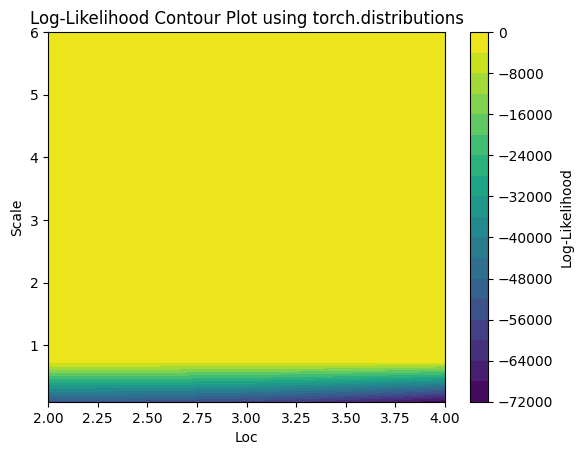

In [11]:
def log_likelihood(data, loc, scale):
    n = len(data)
    normal_distribution = torch.distributions.normal.Normal(loc, scale)
    log_likelihood_value = torch.sum(normal_distribution.log_prob(data)) - n * torch.log(scale * (2 * torch.tensor([1.0]))**0.5)
    return log_likelihood_value

loc_values = torch.linspace(2, 4, 10)
print(loc_values)
scale_values = torch.linspace(0.1, 6, 10)
print(scale_values)
Loc, Scale = torch.meshgrid(loc_values, scale_values)


log_likelihoods = torch.zeros_like(Loc)
for i in range(len(loc_values)):
    for j in range(len(scale_values)):
        log_likelihoods[i, j] = log_likelihood(datapoint, Loc[i, j], Scale[i, j])
        print(log_likelihoods[i, j])
log_likelihoods_np = log_likelihoods.numpy()

contour = plt.contourf(Loc, Scale, log_likelihoods_np, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log-Likelihood')
plt.xlabel('Loc')
plt.ylabel('Scale')
plt.title('Log-Likelihood Contour Plot using torch.distributions')
plt.show()
